    Author: Mikael Koli
    email: koli.mikael@gmail.com
    State: In Development

# EcoSys Market Matcher Demo

This is a template for Jupyter Notebooks

## Navigation:
* [Setup](#Setup)
  * [Imports](#H0_imports)
    * [Built-in Imports](#H0_builtin)
    * [Custom Imports](#H0_custom)
    * [Third party imports](#H0_third)
  * [Versions](#H0_versions)
  * [Settings](#H0_settings)
* [First Section](#H1)

### Imports<a class="anchor" id="H0_imports"></a>

In [6]:
import time

In [7]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [8]:
import sys
sys.path.append("..")
import ecosys

### Versions<a class="anchor" id="H0_versions"></a>

In [9]:
print(f'Python version:        {platform.python_version()}\n')
# Third Party
from pandas import __version__ as pandas_version
from numpy import __version__ as numpy_version
from matplotlib import __version__ as matplotlib_version
from seaborn import __version__ as seaborn_version
from scipy import __version__ as scipy_version

print('---------Third Party---------')
print(f'Pandas version:        {pandas_version}');     del pandas_version
print(f'Numpy version:         {numpy_version}');      del numpy_version
print(f'Scipy version:         {scipy_version}');      del scipy_version
print(f'Matplotlib version:    {matplotlib_version}'); del matplotlib_version
print(f'Seaborn version:       {seaborn_version}');    del seaborn_version


NameError: name 'platform' is not defined

### Settings<a class="anchor" id="H0_settings"></a>

In [10]:
# Warning supressing
import warnings
warnings.filterwarnings('ignore')

# Matplotlib settings
%matplotlib inline
plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Pandas settings
pd.set_option(
    "display.max_rows", 60,
    "display.max_columns", 20,
    "display.max_colwidth", 50,
    "precision", 5,
    "expand_frame_repr", True,
    "display.date_dayfirst", False
)

<br>

## Market Matching Demonstration<a class="anchor" id="H1"></a>

## Generate Random Orders

In [11]:
def generate_orders(n, mean_price):
    order_types = np.random.choice(["market", "limit", "stop"], p=[.05, .9, .05], size=n)
    prices = np.round(np.random.normal(loc=mean_price, scale=0.2, size=n), decimals=4)
    quantities = np.random.poisson(lam=1500, size=n)+500
    return list(zip(prices, quantities, order_types))

In [65]:
orders_buy = [list(elem) + ["bid"] for elem in generate_orders(60, 4.8)]
orders_sell = [list(elem) + ["ask"] for elem in generate_orders(30, 5.2)]
orders = orders_buy+orders_sell
np.random.shuffle(orders)

## Simulate Trading and Visualize Order Book

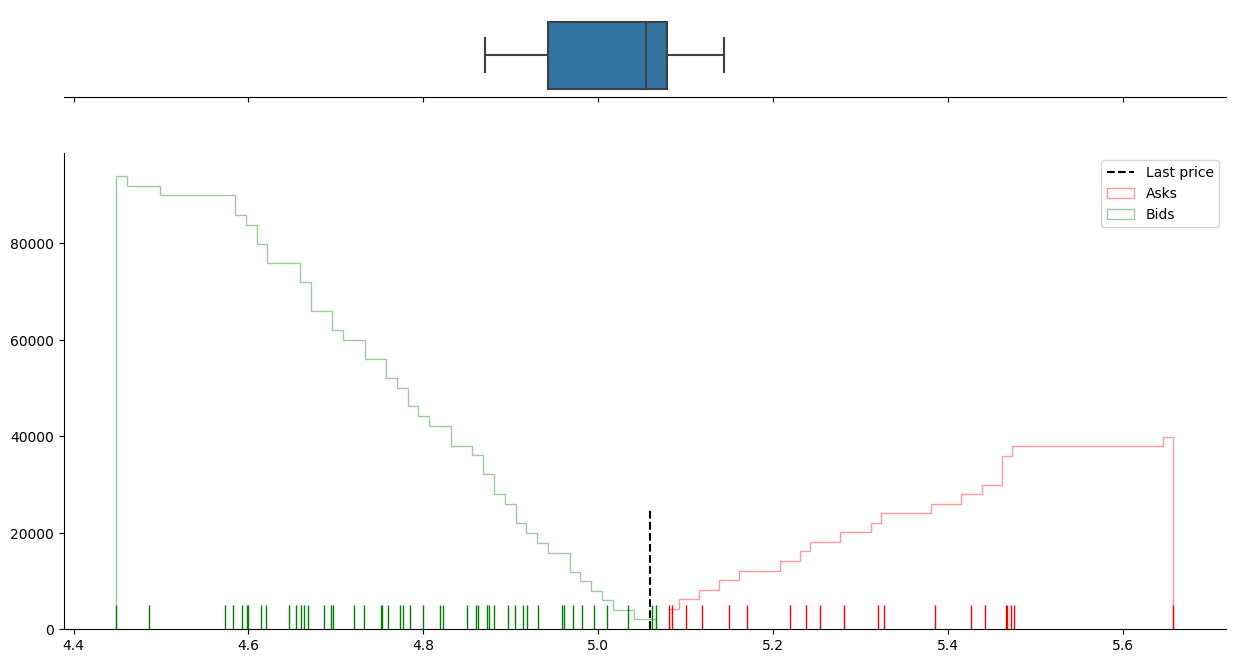

In [66]:
%matplotlib inline
plt.style.use('default')
plt.rcParams['figure.figsize'] = (15.0, 8.0)

my_market = ecosys.StockMatcher("Nokia")

for i, (p, q, order, position) in enumerate(orders):
    method = getattr(my_market, f'place_{position}')
    method(party=f'Investor {i+1}', price=p, quantity=q, order_type=order)

my_market.clear()
my_market.plot_orders()
plt.show()

- X-axis: Price
- Y-axis: Quantity

Small green and red sticks in the horizontal axis represent the price of each individual order.

## Animated Orders

When the code below is run, Matplotlib is opened in Qt window where the orders are animated.

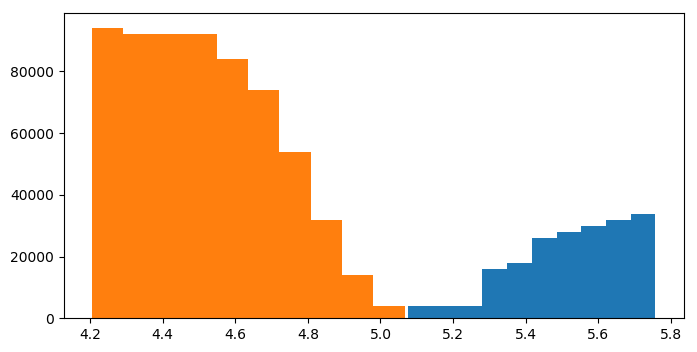

In [68]:
%matplotlib qt
my_market = ecosys.StockMatcher("Nokia")
orders_buy = [list(elem) + ["bid"] for elem in generate_orders(60, 4.8)]
orders_sell = [list(elem) + ["ask"] for elem in generate_orders(30, 5.2)]
orders = orders_buy+orders_sell
np.random.shuffle(orders)

for i, (p, q, order, position) in enumerate(orders):
    method = getattr(my_market, f'place_{position}')
    method(party=f'Investor {i+1}', price=p, quantity=q, order_type=order)
    if i % 5:
        my_market.plot_order_animate()

    my_market.clear()
    time.sleep(0.1)


## Market Information

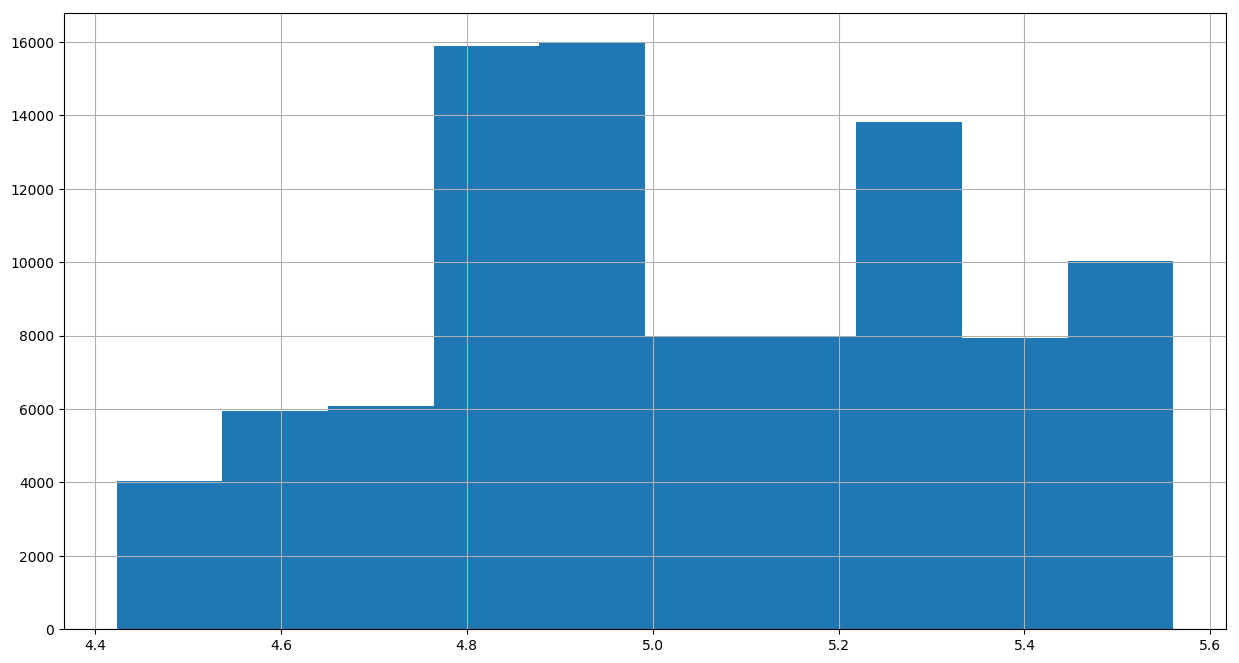

In [34]:
my_market.to_frame()["price"].hist(weights=my_market.to_frame()["quantity"])

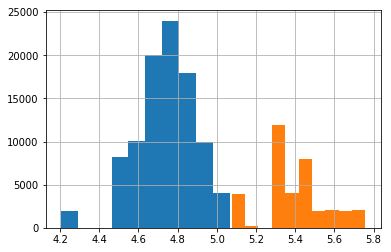

In [70]:
%matplotlib inline
df_plot = my_market.to_frame()
df_plot = df_plot[df_plot.index.get_level_values(1) == "bid"]
df_plot["price"].hist(weights=df_plot["quantity"])

df_plot = my_market.to_frame()
df_plot = df_plot[df_plot.index.get_level_values(1) == "ask"]
df_plot["price"].hist(weights=df_plot["quantity"])

In [47]:
my_market.total_quantities

{'bid': 47956, 'ask': 47713}

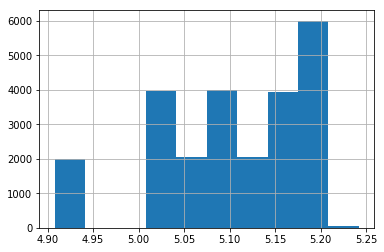

In [71]:
pd.DataFrame(my_market._historical_trades)["price"].hist(weights=pd.DataFrame(my_market._historical_trades)["quantity"])

In [72]:
p = {
    p: (p - perceived_value)
    * ((bids[bids >= p] + bid_momentum) / (asks[asks < p] + ask_momentum + asset_value / p))
    for p in range(??)
}

{6}

In [81]:
my_market.order_book["limit"]["bid"][my_market.order_book["limit"]["bid"]["price"] > 4.8]["quantity"].sum()

33940

In [96]:
%%timeit
pd.DataFrame(my_market._historical_trades)

845 µs ± 35 µs per loop (mean ± std. dev. of 7 runs, 1000 loops each)


In [91]:
np.linspace(my_market.last_price*0.8, my_market.last_price*1.2, 200)

array([4.16696   , 4.17742975, 4.1878995 , 4.19836925, 4.20883899,
       4.21930874, 4.22977849, 4.24024824, 4.25071799, 4.26118774,
       4.27165749, 4.28212724, 4.29259698, 4.30306673, 4.31353648,
       4.32400623, 4.33447598, 4.34494573, 4.35541548, 4.36588523,
       4.37635497, 4.38682472, 4.39729447, 4.40776422, 4.41823397,
       4.42870372, 4.43917347, 4.44964322, 4.46011296, 4.47058271,
       4.48105246, 4.49152221, 4.50199196, 4.51246171, 4.52293146,
       4.53340121, 4.54387095, 4.5543407 , 4.56481045, 4.5752802 ,
       4.58574995, 4.5962197 , 4.60668945, 4.6171592 , 4.62762894,
       4.63809869, 4.64856844, 4.65903819, 4.66950794, 4.67997769,
       4.69044744, 4.70091719, 4.71138693, 4.72185668, 4.73232643,
       4.74279618, 4.75326593, 4.76373568, 4.77420543, 4.78467518,
       4.79514492, 4.80561467, 4.81608442, 4.82655417, 4.83702392,
       4.84749367, 4.85796342, 4.86843317, 4.87890291, 4.88937266,
       4.89984241, 4.91031216, 4.92078191, 4.93125166, 4.94172

In [59]:
pd.DataFrame(my_market.order_book["limit"]["bid"])

,party,price,quantity
0,Investor 1,4.7720,2024
1,Investor 2,4.9656,2016
2,Investor 3,4.8506,1997
3,Investor 7,4.9478,1985
4,Investor 1,4.7053,2081
5,Investor 1,4.6694,2011
6,Investor 1,4.9914,1989
7,Investor 1,4.7842,1995
8,Investor 2,4.4711,2041
9,Investor 2,4.9166,2015


In [43]:
my_market.total_quantities

{'bid': 49844, 'ask': 49788}

In [33]:
my_market.to_frame()["price"].unstack(1)

ask     bid
limit 0   5.2629  4.7720
      1   5.2509  4.9656
      2   5.4746  4.8506
      3   5.3030  4.9478
      4   5.1020  4.7053
      5   5.5602  4.6694
      6   5.1261  4.9914
      7   5.2448  4.7842
      8   5.3033  4.4711
      9   5.1571  4.9166
      10  5.2134  4.7778
      11  5.2392  4.7664
      12  4.9981  4.8272
      13  5.5263  4.8242
      14  5.4015  4.9871
      15  5.5504  4.8092
      16  5.5586  4.5804
      17  5.3779  4.5586
      18  5.0416  4.6480
      19  5.2838  4.9439
      20  5.3434  4.7053
      21  5.4359  4.4233
      22  4.9933  4.9114
      23  5.1086     NaN
stop  0      NaN  4.9705

© 2019 Mikael Koli